In [ ]:
import pandas as pd
df = pd.read_excel("OnlineRetail.xlsx")


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [ ]:
nullid= df[df['Description'].isnull()]
nullid.head(100)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
21785,538136,37509,NaN,2,2010-12-09 15:57:00,0.0,NaN,United Kingdom
21786,538137,62095B,NaN,2,2010-12-09 15:57:00,0.0,NaN,United Kingdom
21787,538138,72814,NaN,2,2010-12-09 15:57:00,0.0,NaN,United Kingdom
21788,538139,84802A,NaN,2,2010-12-09 15:57:00,0.0,NaN,United Kingdom


In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
null_customer_id = df['CustomerID'].isnull().sum()
print(null_customer_id)

133626


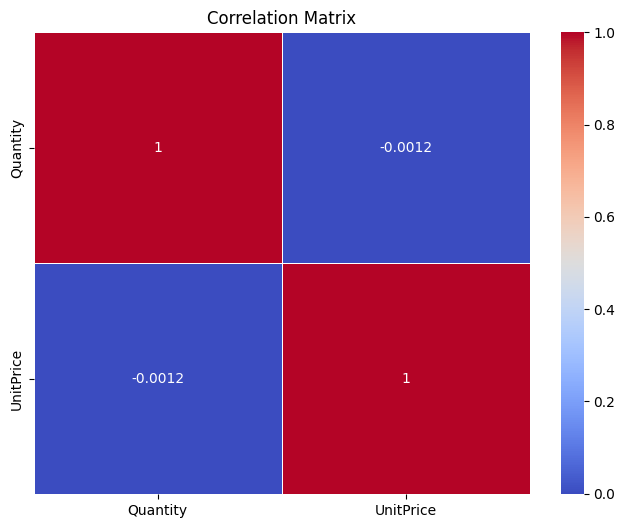

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

numerical_columns = ['Quantity', 'UnitPrice']

# Calculate the correlation matrix
correlation_matrix = df[numerical_columns].corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# all the unique products
prod_fil_df = pd.DataFrame({'Description':df.Description.unique()})
prod_fil_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4224 entries, 0 to 4223
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Description  4223 non-null   object
dtypes: object(1)
memory usage: 33.1+ KB


In [ ]:
import pandas as pd
#Looking for the Invoices starts with c becuse they are cancelled
c_invoice_count  = df[df['InvoiceNo'].str.contains('C', na=False, case=False)]['InvoiceNo'].count()
print("Count of 'Invoice No' starting with 'c':", c_invoice_count )

## There are 9288 orders are cancelled and sent a refund to the customers.

Count of 'Invoice No' starting with 'c': 9288


<ipython-input-106-337b298bf95a>:9: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  X = df.groupby('CustomerID')['Quantity', 'UnitPrice'].sum()
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: Future

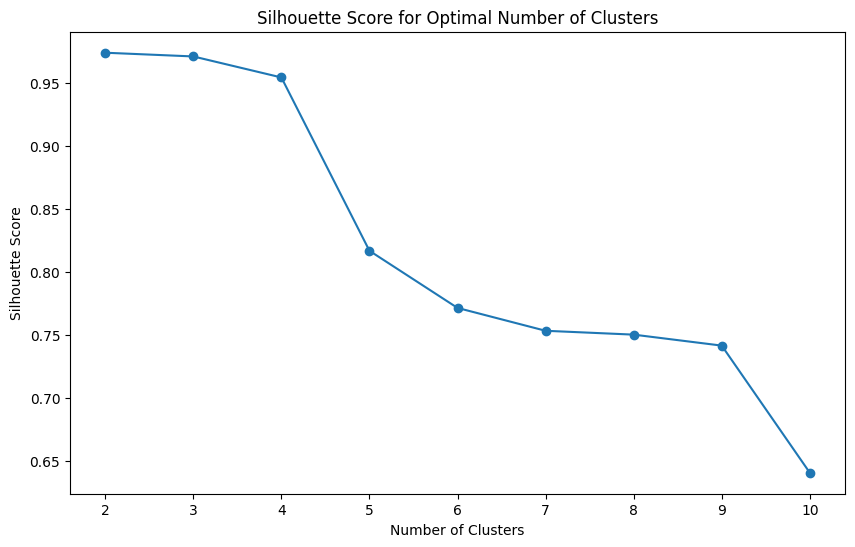

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score


# Preprocess the data for K-means clustering
X = df.groupby('CustomerID')['Quantity', 'UnitPrice'].sum()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine the optimal number of clusters using silhouette score
sil_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    sil_score = silhouette_score(X_scaled, kmeans.labels_)
    sil_scores.append(sil_score)

# Plot silhouette scores to determine the optimal number of clusters
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), sil_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal Number of Clusters')
plt.show()

In [ ]:
# Perform K-means clustering with the 5 clusters by considering the elbow method results.
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_scaled)
X['Cluster'] = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
# Analyze the clusters
X['Total'] = X['Quantity'] * X['UnitPrice']
cluster_analysis = X.groupby('Cluster')['Quantity', 'UnitPrice','Total'].mean()
print('Cluster Analysis:')
print(cluster_analysis)

Cluster Analysis:
              Quantity     UnitPrice         Total
Cluster                                           
0           623.920145    207.160623  2.229695e+05
1         25433.142857  28197.814286  6.875675e+08
2         59707.111111   3414.222222  1.973857e+08
3        196719.000000   5400.210000  1.062324e+09
4          6707.733333   1502.982238  8.439634e+06


<ipython-input-108-bc7f8ed7c4fc>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  cluster_analysis = X.groupby('Cluster')['Quantity', 'UnitPrice','Total'].mean()


In [ ]:
#combining the labels and dataframen
sepcldf = df.merge(X['Cluster'], on='CustomerID')


grsepcldf = sepcldf.groupby('CustomerID').apply(lambda x: x.reset_index(drop=True))
grsepcldf.head()



InvoiceNo StockCode                        Description  Quantity  \
CustomerID                                                                      
12346.0    0    541431     23166     MEDIUM CERAMIC TOP STORAGE JAR     74215   
           1   C541433     23166     MEDIUM CERAMIC TOP STORAGE JAR    -74215   
12347.0    0    537626     85116    BLACK CANDELABRA T-LIGHT HOLDER        12   
           1    537626     22375  AIRLINE BAG VINTAGE JET SET BROWN         4   
           2    537626     71477  COLOUR GLASS. STAR T-LIGHT HOLDER        12   

                     InvoiceDate  UnitPrice  CustomerID         Country  \
CustomerID                                                                
12346.0    0 2011-01-18 10:01:00       1.04     12346.0  United Kingdom   
           1 2011-01-18 10:17:00       1.04     12346.0  United Kingdom   
12347.0    0 2010-12-07 14:57:00       2.10     12347.0         Iceland   
           1 2010-12-07 14:57:00       4.25     12347.0         Iceland   
           2 2010-12-07 14:57:00       3.25     12347.0         Iceland   

              Cluster  
CustomerID             
12346.0    0        0  
           1        0  
12347.0    0        0  
           1        0  
           2        0

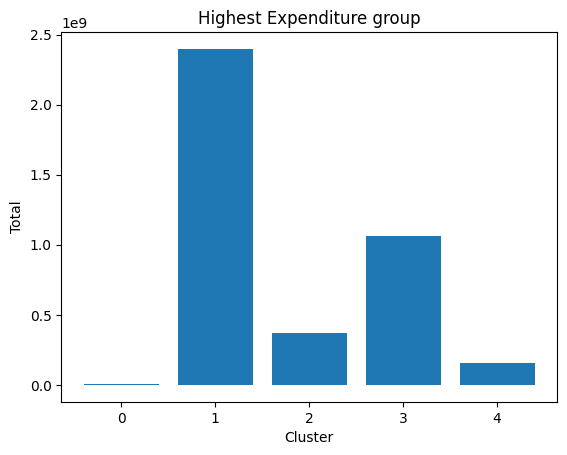

In [ ]:
import matplotlib.pyplot as plt
X['Total'] = X['Total'].astype(int)
# Create a bar plot
plt.bar(X.Cluster, X.Total)
# Add labels and title
plt.xlabel('Cluster')
plt.ylabel('Total')
plt.title('Highest Expenditure group')
# Show the plot
plt.show()

#Group 1 has the highest Expenditure, group - 3 is second and group - 2 is thrird. so these groups will be our focus.

In [ ]:
Total_sum = X.groupby('Cluster')['Total'].sum()
Total_sum = Total_sum.astype(int)
print('Total_sum:')
print(Total_sum)

Total_sum:
Cluster
0     924206811
1    4812972515
2    1776471742
3    1062323910
4    1772323070
Name: Total, dtype: int64


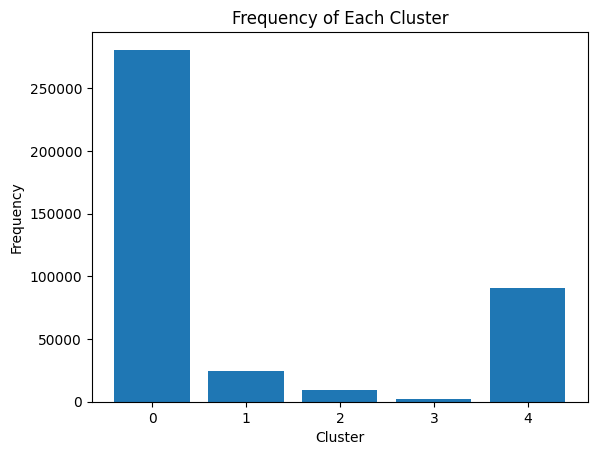

In [ ]:
clustr_counts = sepcldf['Cluster'].value_counts()

# Create a bar plot
plt.bar(clustr_counts.index, clustr_counts.values)

# Add labels and title
plt.xlabel('Cluster')
plt.ylabel('Frequency')
plt.title('Frequency of Each Cluster')

# Show the plot
plt.show()

In [ ]:
topselpr = sepcldf.groupby(['Cluster', 'Description','StockCode'])['Quantity'].sum()

# Sort the products within each cluster based on summed quantities
sorted_products = topselpr.groupby('Cluster', group_keys=False).nlargest(5)

# Display the top buying products for each cluster
print(sorted_products)

#Group 1 buys a lot of these stockid prodcuts 22693 ,85099B , 20971, 20668 and 22386
#Group 3 buys a lot of these stockid prodcuts 23084, 22629 , 21212, 22630  and 22326
#Group 2 buys a lot of these stockid prodcuts 22189, 22469 , 85123A , 85099B and 22470

Cluster  Description                          StockCode
0        WORLD WAR 2 GLIDERS ASSTD DESIGNS    84077        25978
         ASSORTED COLOUR BIRD ORNAMENT        84879        19401
         JUMBO BAG RED RETROSPOT              85099B       18914
         WHITE HANGING HEART T-LIGHT HOLDER   85123A       15944
         RABBIT NIGHT LIGHT                   23084        13231
1        GROW A FLYTRAP OR SUNFLOWER IN TIN   22693         5016
         JUMBO BAG RED RETROSPOT              85099B        2091
         PINK BLUE FELT CRAFT TRINKET BOX     20971         2047
         DISCO BALL CHRISTMAS DECORATION      20668         1872
         JUMBO BAG PINK POLKADOT              22386         1688
2        CREAM HEART CARD HOLDER              22189         6054
         HEART OF WICKER SMALL                22469         5873
         WHITE HANGING HEART T-LIGHT HOLDER   85123A        5341
         JUMBO BAG RED RETROSPOT              85099B        4770
         HEART OF WICKER LARGE    

In [ ]:

prodclusters = sepcldf.groupby(['Description', 'StockCode']).agg({'Cluster': 'unique', 'Quantity': 'sum'}).reset_index()


lucre_products = prodclusters.sort_values(by=['Quantity',], ascending=False).head(10)
# Print the top products and their cluster labels
print("Top Products and their Cluster Labels:")
print(lucre_products)

Top Products and their Cluster Labels:
                             Description StockCode          Cluster  Quantity
3825   WORLD WAR 2 GLIDERS ASSTD DESIGNS     84077     [0, 4, 1, 2]     53215
1778             JUMBO BAG RED RETROSPOT    85099B  [0, 2, 4, 1, 3]     45066
217        ASSORTED COLOUR BIRD ORNAMENT     84879  [0, 2, 4, 1, 3]     35314
3736  WHITE HANGING HEART T-LIGHT HOLDER    85123A  [0, 4, 2, 1, 3]     34147
2288     PACK OF 72 RETROSPOT CAKE CASES     21212  [4, 0, 2, 1, 3]     33409
2625                      POPCORN HOLDER     22197     [4, 0, 2, 1]     30504
2682                  RABBIT NIGHT LIGHT     23084  [4, 2, 0, 1, 3]     27094
2066             MINI PAINT SET VINTAGE      22492  [4, 0, 1, 2, 3]     25880
2254          PACK OF 12 LONDON TISSUES      22616     [4, 2, 0, 1]     25321
2286  PACK OF 60 PINK PAISLEY CAKE CASES     21977  [0, 2, 4, 1, 3]     24163


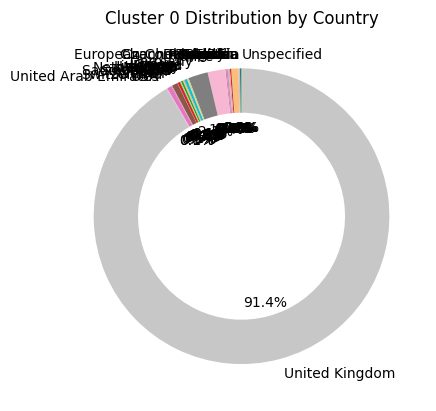

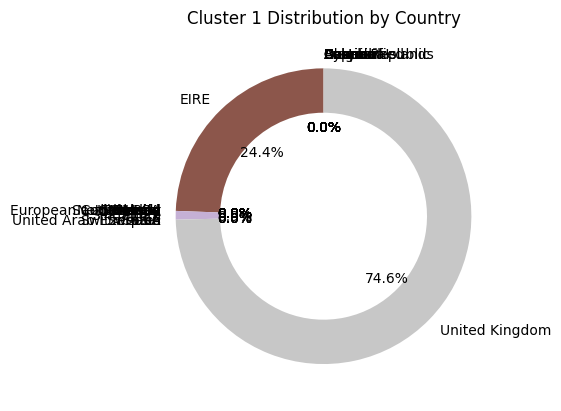

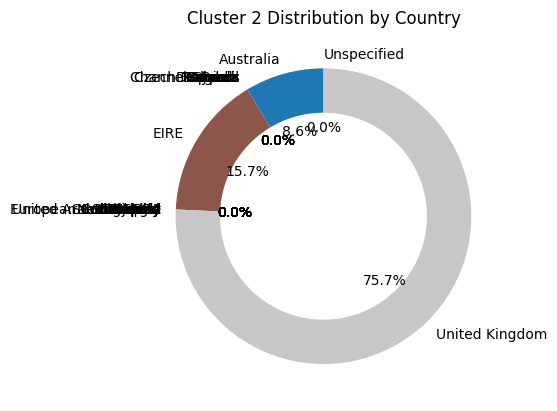

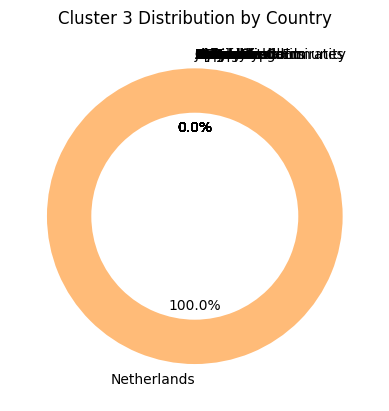

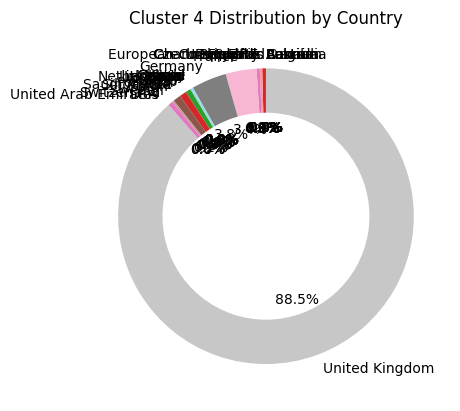

In [ ]:
grouped = sepcldf.groupby(['Country', 'Cluster']).size().unstack(fill_value=0)

# Plotting pie charts for each cluster
colors = plt.cm.tab20.colors  # Use a colormap for distinct colors
cluster_labels = grouped.columns

for cluster_label in cluster_labels:
    cluster_data = grouped[cluster_label]
    plt.figure()
    plt.pie(cluster_data, labels=cluster_data.index, colors=colors, autopct='%1.1f%%',
            startangle=90, wedgeprops=dict(width=0.3))
    plt.title(f'Cluster {cluster_label} Distribution by Country')

plt.show()

#Group 1 has Uk and EIRE
#Group 3 has  Netherlands
#Group 2 has UK, EIRE and Austraila


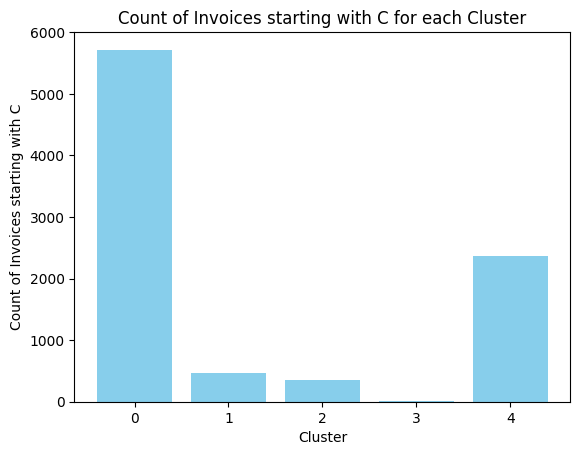

In [ ]:
can_grsepcl = (sepcldf[sepcldf['InvoiceNo'].str.contains('C', na=False, case=False)]
                 .groupby('Cluster')['InvoiceNo']
                 .count())
can_grsepcl.head()
can_grsepcldf = pd.DataFrame(can_grsepcl)
plt.bar(can_grsepcldf.index, can_grsepcldf['InvoiceNo'], color='skyblue')

# Adding labels and title
plt.xlabel('Cluster')
plt.ylabel('Count of Invoices starting with C')
plt.title('Count of Invoices starting with C for each Cluster')

# Show the plot
plt.show()

# Group 3 has the lowest cancellaiton, group 2 is second and group - 1 is third

<ipython-input-126-b479f62d1cb9>:9: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  P = df.groupby('StockCode')['Quantity', 'UnitPrice'].sum()
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureW

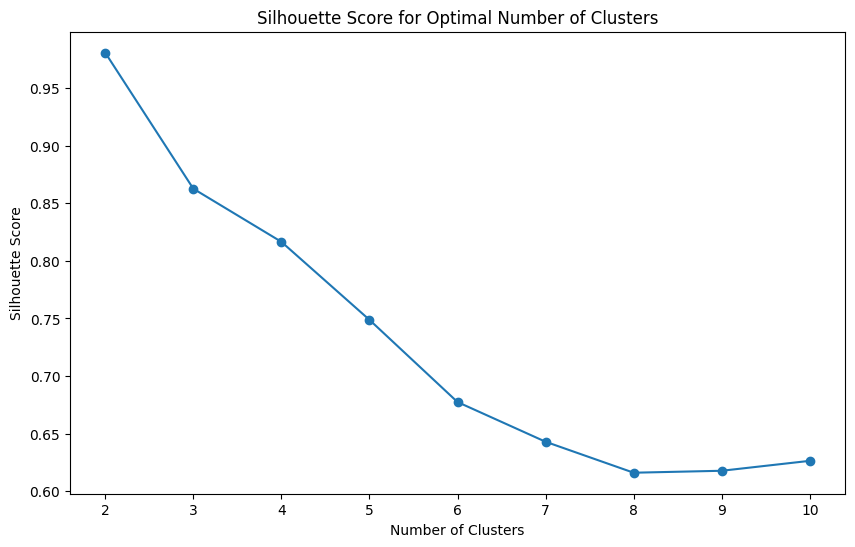

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

## product analysis by using stockid
# Preprocess the data for K-means clustering
P = df.groupby('StockCode')['Quantity', 'UnitPrice'].sum()
scaler = StandardScaler()
P_scaled = scaler.fit_transform(P)

# Determine the optimal number of clusters using silhouette score
sil_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(P_scaled)
    sil_score = silhouette_score(P_scaled, kmeans.labels_)
    sil_scores.append(sil_score)

# Plot silhouette scores to determine the optimal number of clusters
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), sil_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal Number of Clusters')
plt.show()

In [ ]:
# Perform K-means clustering with the 6 clusters by considering the elbow method results.
kmeans = KMeans(n_clusters=6, random_state=42)
kmeans.fit(P_scaled)
P['Cluster'] = kmeans.labels_

# Analyze the clusters
P['Total'] = P['Quantity'] * P['UnitPrice']


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
#combining the labels and dataframen
sepclprdf = df.merge(P['Cluster'], on='StockCode')

topselprrr = sepclprdf.groupby(['Cluster', 'Description','StockCode'])['Quantity'].sum()

# Sort the products within each cluster based on summed quantities
sorted_products = topselprrr.groupby('Cluster', group_keys=False).nlargest(5)

# Display the top buying products for each cluster
print(sorted_products)

Cluster  Description                          StockCode
0        TRAVEL CARD WALLET I LOVE LONDON     23005         4782
         PIECE OF CAMO STATIONERY SET         16259         3272
         SMALL FOLDING SCISSOR(POINTED EDGE)  16008         2892
         ASSORTED CREEPY CRAWLIES             21830         2621
         VICTORIAN  METAL POSTCARD SPRING     21135         2574
1        Manual                               M             3164
         DOTCOM POSTAGE                       DOT            707
         AMAZON FEE                           AMAZONFEE      -30
2        MINI PAINT SET VINTAGE               22492        26437
         PACK OF 12 LONDON TISSUES            22616        26315
         PACK OF 60 PINK PAISLEY CAKE CASES   21977        24753
         VICTORIAN GLASS HANGING T-LIGHT      22178        23854
         ASSORTED COLOURS SILK FAN            15036        23082
3        JUMBO BAG OWLS                       20713        11201
         LUNCH BOX I LOVE LONDON  

In [ ]:
product_clusters = sepclprdf.groupby(['Description', 'StockCode']).agg({'Cluster': 'unique', 'Quantity': 'sum'}).reset_index()


lucrative_products = product_clusters.sort_values(by=['Quantity',], ascending=False).head(10)
# Print the top products and their cluster labels
print("Top Products and their Cluster Labels:")
print(lucrative_products)


Top Products and their Cluster Labels:
                             Description StockCode Cluster  Quantity
4234   WORLD WAR 2 GLIDERS ASSTD DESIGNS     84077     [4]     53847
2009             JUMBO BAG RED RETROSPOT    85099B     [4]     47363
310        ASSORTED COLOUR BIRD ORNAMENT     84879     [4]     36381
2901                      POPCORN HOLDER     22197     [4]     36334
2547     PACK OF 72 RETROSPOT CAKE CASES     21212     [4]     36039
4139  WHITE HANGING HEART T-LIGHT HOLDER    85123A     [4]     35025
2965                  RABBIT NIGHT LIGHT     23084     [4]     30680
2311             MINI PAINT SET VINTAGE      22492     [2]     26437
2513          PACK OF 12 LONDON TISSUES      22616     [2]     26315
2545  PACK OF 60 PINK PAISLEY CAKE CASES     21977     [2]     24753


In [ ]:
lucrative_products = P.sort_values(by=['Total',], ascending=False).head(10)
# Print the top products and their cluster labels
print("Top Products and their Cluster Labels:")
print(lucrative_products)

Top Products and their Cluster Labels:
           Quantity  UnitPrice  Cluster      Total
StockCode                                         
M              3164  214448.41        1  678514769
22423         12980   30360.61        2  394080717
DOT            1707  206252.06        1  352072266
POST           6353   46388.47        3  294705949
85123A        38830    7177.79        4  278713585
85099B        47363    5333.30        4  252601087
47566         18022    9979.62        2  179852711
84879         36221    2584.77        4   93622954
22197         56450    1527.11        4   86205359
22086         18902    4054.90        2   76645719


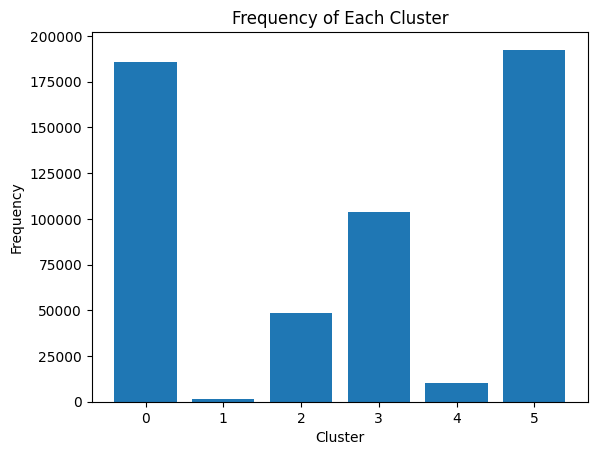

In [ ]:
cluster_counts = sepclprdf['Cluster'].value_counts()

# Create a bar plot
plt.bar(cluster_counts.index, cluster_counts.values)

# Add labels and title
plt.xlabel('Cluster')
plt.ylabel('Frequency')
plt.title('Frequency of Each Cluster')

# Show the plot
plt.show()

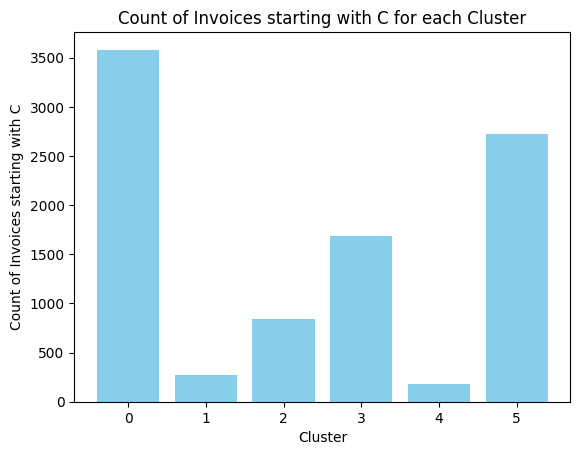

In [ ]:
can_grsepcll = (sepclprdf[sepclprdf['InvoiceNo'].str.contains('C', na=False, case=False)]
                 .groupby('Cluster')['InvoiceNo']
                 .count())
can_grsepcll.head()
can_grsepclldf = pd.DataFrame(can_grsepcll)
plt.bar(can_grsepclldf.index, can_grsepclldf['InvoiceNo'], color='skyblue')

# Adding labels and title
plt.xlabel('Cluster')
plt.ylabel('Count of Invoices starting with C')
plt.title('Count of Invoices starting with C for each Cluster')

# Show the plot
plt.show()

In [ ]:
#Recommandation
product_revenue = df.groupby('StockCode')['Quantity','UnitPrice'].sum()
lucrative_products = product_revenue.sort_values(by=['Quantity',], ascending=False).head(10)
print("\nMost Lucrative Products:")
print(lucrative_products)



Most Lucrative Products:
           Quantity  UnitPrice
StockCode                     
22197         56450    1527.11
84077         53847     173.39
85099B        47363    5333.30
85123A        38830    7177.79
84879         36221    2584.77
21212         36039    1047.04
23084         30646    2496.53
22492         26437     304.81
22616         26315     236.87
21977         24753     664.13


<ipython-input-131-470b2c46e6b8>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  product_revenue = df.groupby('StockCode')['Quantity','UnitPrice'].sum()
